In [1]:
import sympy as sp
import numpy as np
from IPython.display import display, Math
from sympy import pprint,simplify, expand, sstr, latex
from matplotlib import pyplot as plt


# Define symbolic variables
m, psi_n1, psi_n1_bar, psi_n2, psi_n2_bar, psi_n3, psi_n3_bar, t, a, b = sp.symbols('m psi_n1 psi_n1_bar psi_n2 psi_n2_bar psi_n3 psi_n3_bar t a b')
m, t, a, b = sp.symbols('m t a b', real=True)
eps=sp.Symbol('ε', real=True)
R=sp.Rational
# Define the symbolic expressions for theta, phi, and phi_1`

# Define the 4x4 rotation matrix R
H = sp.Matrix([[m, 0, 0, eps, 0, eps],
               [0, m, eps, 0, eps, 0],
               [0, eps, m, 0, 0, eps],
               [eps, 0, 0, m, eps, 0],
               [0, eps, 0,eps,m,0],
               [eps, 0, eps, 0, 0,m]])
I=sp.Matrix([[1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]])
U_nnbar = sp.Matrix([
    [ sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],
    [ sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],

    [ 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0 ],
    [ 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0 ],

    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2) ],
    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2) ],
])

# Optional: check unitarity
U_131= sp.Matrix([
    [sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0],
    [0,  sp.sqrt(2)*R(1,2), 0, -sp.sqrt(2)*R(1,2), 0, 0],
    [-sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0],
    [0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0,  0, 0, 0, 0,  1]
])
U_11=sp.sqrt(3)*R(1,3)
U_22=U_11
U_12=(sp.sqrt(6))*R(1,3)
U_21=-U_12
U_3526= sp.Matrix([
    [1, 0, 0, 0, 0, 0],
    [0,  U_11, 0, 0,0, U_12 ],
    [0, 0, U_11, 0, U_12, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, U_21, 0, U_22, 0],
    [0,  U_21, 0, 0, 0,  U_22]
])
S = sp.simplify(U_nnbar@U_131@U_3526)
display(Math(r"U_{n\bar n} = " + latex(U_nnbar) + r",\quad U_{1324} = " + latex(U_131) + r",\quad U_{3526} = " + latex(U_3526) +r",\quad S = " +latex(S)  ))
H_D=sp.simplify(S.T@H@S)
H_D_R=H_D-m*I
S_diag=sp.simplify(S*sp.exp(-sp.I*H_D_R*t)*S.H)

<IPython.core.display.Math object>

In [2]:
U_nnbar.T@H@U_nnbar

Matrix([
[m,  0, ε,  0, ε,  0],
[0,  m, 0, -ε, 0, -ε],
[ε,  0, m,  0, ε,  0],
[0, -ε, 0,  m, 0, -ε],
[ε,  0, ε,  0, m,  0],
[0, -ε, 0, -ε, 0,  m]])

In [3]:
H_1=H-I*m

In [4]:
#U_3.T@U_131.T@U_nnbar.T@H_1@U_nnbar@U_131@U_3

In [5]:
U_3=sp.Matrix([[1, 0, 0, 0, 0, 0],
              [0, sp.sqrt(2)*R(1,2), 0, 0, 0, -sp.sqrt(2)*R(1,2)],
              [0, 0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, -sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
              [0, sp.sqrt(2)*R(1,2), 0, 0, 0, sp.sqrt(2)*R(1,2)]])

In [6]:
#S_diag

In [7]:
k=6
P_6=sp.zeros(k
             ,k)
for i in range(k):
    for j in range (k):
        P_6[i,j]=sp.simplify(sp.expand_complex(S_diag[i,j]*S_diag[i,j].conjugate().rewrite(sp.sin)))
sp.simplify(sp.expand_complex(S_diag[0,0]*S_diag[0,0].conjugate()))
P_6

Matrix([
[2*cos(t*ε)/9 + 2*cos(2*t*ε)/9 + 2*cos(3*t*ε)/9 + cos(4*t*ε)/18 + 5/18,    -4*sin(t*ε)**4/9 + 8*sin(t*ε)**2/9 - 2*cos(t*ε)/9 + 2*cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9],
[   -4*sin(t*ε)**4/9 + 8*sin(t*ε)**2/9 - 2*cos(t*ε)/9 + 2*cos(3*t*ε)/9, 2*cos(t*ε)/9 + 2*cos(2*t*ε)/9 + 2*cos(3*t*ε)/9 + cos(4*t*ε)/18 + 5/18,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9],
[              cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*

In [8]:
s = sp.simplify(P_6[0,0] + P_6[0,1] + P_6[0,2] + P_6[0,3] + P_6[0,4] + P_6[0,5])

In [9]:
sp.simplify(s)

1

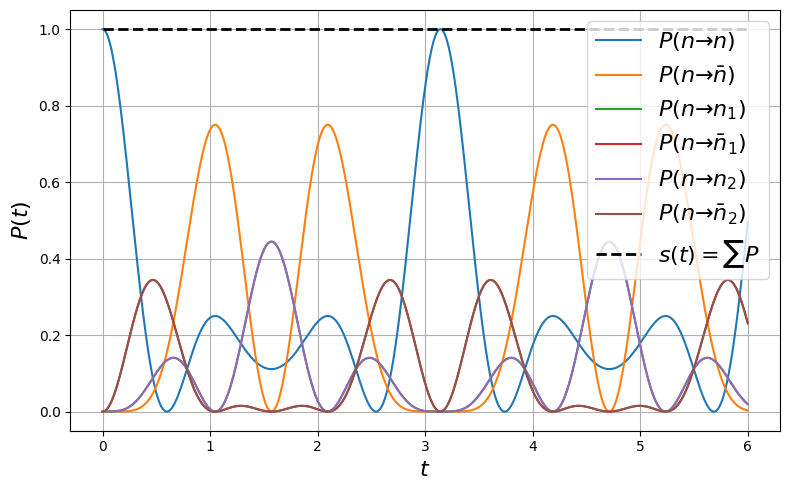

In [11]:
params = {
    eps: 2,
    m: 1.0
}
P_dict = {
    r"$P(n\to n)$": P_6[0,0],
    r"$P(n\to \bar n)$": P_6[0,1],
    r"$P(n\to n_1)$": P_6[0,2],
    r"$P(n\to \bar n_1)$": P_6[0,3],
    r"$P(n\to n_2)$": P_6[0,4],
    r"$P(n\to \bar n_2)$": P_6[0,5],
}
P_funcs = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict.items()
}
t_vals = np.linspace(0, 6, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs.items():
    plt.plot(t_vals, f(t_vals), label=label)
#plt.plot(t_vals, np.ones_like(t_vals), 'k--', linewidth=2, label=r"$s=1$")
s_simpl2 = sp.trigsimp(s)

s_num_expr = sp.simplify(s_simpl2.subs(params))


s_func = sp.lambdify(t, s_num_expr, "numpy")


y = s_func(t_vals)
y = np.full_like(t_vals, y, dtype=float) if np.isscalar(y) else y
plt.plot(t_vals, y, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4x4

In [12]:
H_44 = sp.Matrix([[m, 0, 0, eps],
               [0, m, eps, 0],
               [0, eps, m, 0],
               [eps, 0, 0, m]])
I_44=sp.Matrix([[1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]])
H_44_r=H_44-m*I_44
U_nnbar_44= sp.Matrix([
    [ sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0 ],
    [ sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0 ],

    [ 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2) ],
    [ 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2) ]
])

# Optional: check unitarity
sp.simplify(U_nnbar_44)
U_1324_44= sp.Matrix([
    [sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
    [0,  sp.sqrt(2)*R(1,2), 0, -sp.sqrt(2)*R(1,2)],
    [-sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
    [0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2)],
])
S_44=U_nnbar_44@U_1324_44
H_D_44=S_44.T@H_44_r@S_44

S_sum_44=sp.simplify(sp.exp(-sp.I*S_44@H_D_44@S_44.H*t))
n=4
P_4=sp.zeros(n,n)
for i in range(n):
    for j in range(n):
        P_4[i,j]=sp.simplify(sp.expand_complex(S_sum_44[i,j]*S_sum_44[i,j].conjugate()))
display(Math(r"U_{n\bar n-44} = " + latex(U_nnbar_44) + r",\quad U_{1324-44} = " + latex(U_1324_44) +r",\quad S_{44} = " +latex(S_44)  ))

<IPython.core.display.Math object>

In [13]:
#P_4

In [14]:
s_4 = sp.simplify(P_4[0,0] + P_4[0,1] + P_4[0,2] + P_4[0,3])
s_4

1

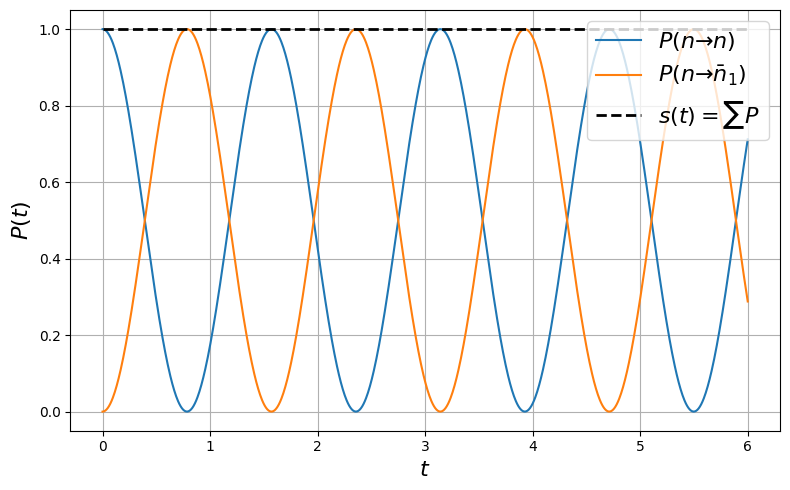

In [16]:
params = {
    eps: 2,
    m: 1.0
}
P_dict_44 = {
    r"$P(n\to n)$": P_4[0,0],
    #r"$P(\bar n_1\to n_1)$": expr_trig_12_44,
    #r"$P(n_2\to n_1)$": expr_trig_13_44,
    r"$P(n\to \bar n_1)$": P_4[0,3],
}
P_funcs_44 = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict_44.items()
}
t_vals = np.linspace(0, 6, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs_44.items():
    plt.plot(t_vals, f(t_vals), label=label)
s_simpl2_4 = sp.trigsimp(s_4)

s_num_expr_4 = sp.simplify(s_simpl2_4.subs(params))


s_func_4 = sp.lambdify(t, s_num_expr_4, "numpy")


y_4 = s_func_4(t_vals)
y_4 = np.full_like(t_vals, y_4, dtype=float) if np.isscalar(y_4) else y_4
plt.plot(t_vals, y_4, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4x4 mixing

In [21]:
eta=sp.Symbol('η', real=True)
H_44_split = sp.Matrix([[0, 0, eta, eps],
               [0, 0, eps, eta],
               [eta, eps, 0, 0],
               [eps, eta, 0, 0]])
H_D_44_s=sp.simplify(S_44.T@H_44_split@S_44)
S_sum_44_s=sp.simplify(S_44*sp.exp(-sp.I*H_D_44_s*t)*S_44.T)

In [22]:
H_D_44_s

Matrix([
[-ε - η,      0,     0,     0],
[     0, -ε + η,     0,     0],
[     0,      0, ε + η,     0],
[     0,      0,     0, ε - η]])

In [23]:
S_44

Matrix([
[ 1/2, -1/2, 1/2,  1/2],
[ 1/2,  1/2, 1/2, -1/2],
[-1/2, -1/2, 1/2, -1/2],
[-1/2,  1/2, 1/2,  1/2]])

In [24]:
H_44

Matrix([
[m, 0, 0, ε],
[0, m, ε, 0],
[0, ε, m, 0],
[ε, 0, 0, m]])

In [25]:
H_44_split_eta = sp.Matrix([[a, 0, eta, eps],
               [0, -a, eps, eta],
               [eta, eps, b, 0],
               [eps, eta, 0, -b]])

In [26]:
#sp.simplify(sp.exp(-sp.I*H_44_split_eta*t))

In [27]:
P_4_mixing=sp.zeros(n,n)
for i in range(n):
    for j in range (n):
        P_4_mixing[i,j]=sp.simplify(sp.expand_complex(S_sum_44_s[i,j]*S_sum_44_s[i,j].conjugate()))
P_4_mixing

Matrix([
[cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2, sin(t*η)**2*cos(t*ε)**2, sin(t*ε)**2*cos(t*η)**2],
[sin(t*ε)**2*sin(t*η)**2, cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2],
[sin(t*η)**2*cos(t*ε)**2, sin(t*ε)**2*cos(t*η)**2, cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2],
[sin(t*ε)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2, sin(t*ε)**2*sin(t*η)**2, cos(t*ε)**2*cos(t*η)**2]])

In [28]:
P_4_mixing[0,1]

sin(t*ε)**2*sin(t*η)**2

In [29]:
s_4_mixing = sp.simplify(P_4_mixing[0,0] + P_4_mixing[0,1] + P_4_mixing[0,2] + P_4_mixing[0,3])
s_4_mixing

1

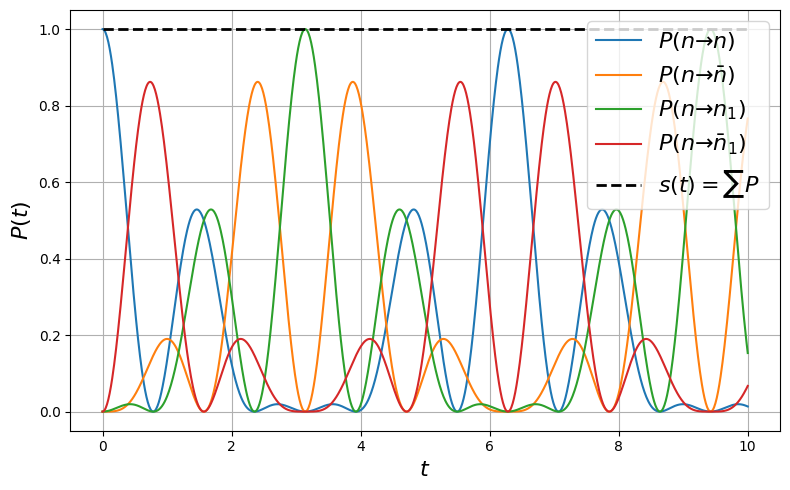

In [166]:
params = {
    eps: 2,
    m: 1.0,
    eta: 2/4
}
P_dict_44_s = {
    r"$P(n\to n)$": P_4_mixing[0,0],
    r"$P(n\to \bar n)$": P_4_mixing[0,1],
    r"$P(n\to n_1)$": P_4_mixing[0,2],
    r"$P(n\to \bar n_1)$": P_4_mixing[0,3],
}
P_funcs_44_s = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict_44_s.items()
}
t_vals = np.linspace(0, 10, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs_44_s.items():
    plt.plot(t_vals, f(t_vals), label=label)
    
s_simpl2_4_mixing = sp.trigsimp(s_4_mixing)

s_num_expr_4_mixing = sp.simplify(s_simpl2_4_mixing.subs(params))


s_func_4_mixing = sp.lambdify(t, s_num_expr_4_mixing, "numpy")


y_4_mixing = s_func_4_mixing(t_vals)
y_4_mixing = np.full_like(t_vals, y_4_mixing, dtype=float) if np.isscalar(y_4_mixing) else y_4_mixing
plt.plot(t_vals, y_4_mixing, 'k--', linewidth=2, label=r"$s(t)=\sum P$")


plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

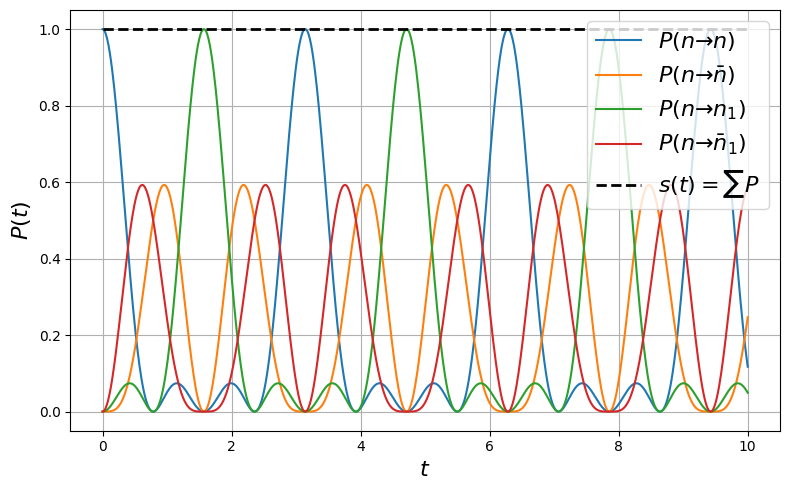

In [167]:
params = {
    eps: 2,
    m: 1.0,
    eta: 2/2
}
P_dict_44_s = {
    r"$P(n\to n)$": P_4_mixing[0,0],
    r"$P(n\to \bar n)$": P_4_mixing[0,1],
    r"$P(n\to n_1)$": P_4_mixing[0,2],
    r"$P(n\to \bar n_1)$": P_4_mixing[0,3],
}
P_funcs_44_s = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict_44_s.items()
}
t_vals = np.linspace(0, 10, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs_44_s.items():
    plt.plot(t_vals, f(t_vals), label=label)
    
s_simpl2_4_mixing = sp.trigsimp(s_4_mixing)

s_num_expr_4_mixing = sp.simplify(s_simpl2_4_mixing.subs(params))


s_func_4_mixing = sp.lambdify(t, s_num_expr_4_mixing, "numpy")


y_4_mixing = s_func_4_mixing(t_vals)
y_4_mixing = np.full_like(t_vals, y_4_mixing, dtype=float) if np.isscalar(y_4_mixing) else y_4_mixing
plt.plot(t_vals, y_4_mixing, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8x8

In [168]:
H_4 = sp.Matrix([[0, 0, 0, eps, 0, eps, 0, eps],
               [0, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0, 0, 0, eps, 0, eps],
               [eps, 0, 0, 0, eps, 0, eps, 0],
               [0, eps, 0,eps, 0, 0, 0, eps],
               [eps, 0, eps, 0, 0, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, 0],
               [eps, 0, eps, 0, eps, 0, 0, 0]])

In [169]:
H_4

Matrix([
[0, 0, 0, ε, 0, ε, 0, ε],
[0, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, 0, 0, ε, 0, ε],
[ε, 0, 0, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, 0, 0, ε],
[ε, 0, ε, 0, 0, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, 0],
[ε, 0, ε, 0, ε, 0, 0, 0]])

In [170]:
S_4=sp.simplify(sp.exp(-sp.I*H_4*t))

In [171]:
sp.simplify(S_88_3.T@S_88_2.T@S_88_1.T@H_4@S_88_1@S_88_2@S_88_3)

Matrix([
[-ε,    0,  0, 0,  0, 0,   0, 0],
[ 0, -3*ε,  0, 0,  0, 0,   0, 0],
[ 0,    0, -ε, 0,  0, 0,   0, 0],
[ 0,    0,  0, ε,  0, 0,   0, 0],
[ 0,    0,  0, 0, -ε, 0,   0, 0],
[ 0,    0,  0, 0,  0, ε,   0, 0],
[ 0,    0,  0, 0,  0, 0, 3*ε, 0],
[ 0,    0,  0, 0,  0, 0,   0, ε]])

In [172]:
sp.simplify(S_4)

Matrix([
[((exp(2*I*t*ε) + 3)*exp(4*I*t*ε) + 3*exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8, ((3 - exp(2*I*t*ε))*exp(4*I*t*ε) - 3*exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,       (exp(6*I*t*ε) - exp(4*I*t*ε) - exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,      (-exp(6*I*t*ε) - exp(4*I*t*ε) + exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,       (exp(6*I*t*ε) - exp(4*I*t*ε) - exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,      (-exp(6*I*t*ε) - exp(4*I*t*ε) + exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,       (exp(6*I*t*ε) - exp(4*I*t*ε) - exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,      (-exp(6*I*t*ε) - exp(4*I*t*ε) + exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8],
[((3 - exp(2*I*t*ε))*exp(4*I*t*ε) - 3*exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8, ((exp(2*I*t*ε) + 3)*exp(4*I*t*ε) + 3*exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,      (-exp(6*I*t*ε) - exp(4*I*t*ε) + exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,       (exp(6*I*t*ε) - exp(4*I*t*ε) - exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,      (-exp(6*I*t*ε) - exp(4*I*t*ε) + exp(2*I*t*ε) + 1)*exp(-3*I*t*ε)/8,       (exp(6*I*t*ε) - exp(4*I*t*ε) - exp(2*I*t*ε) + 

In [173]:
k_8=8
P_8=sp.zeros(k_8,k_8)
for i in range(k_8):
    for j in range (k_8):
        P_8[i,j]=sp.simplify(sp.expand_complex(S_4[i,j]*S_4[i,j].conjugate()))
sp.simplify(sp.expand_complex(S_4[0,7]*S_4[0,7].conjugate()))
P_8

Matrix([
[                                                                                                      cos(t*ε)**6,                                                                                                       sin(t*ε)**6, -cos(2*t*ε)**2/8 + cos(2*t*ε)*cos(6*t*ε)/16 - cos(2*t*ε)/32 - cos(4*t*ε)/32 + cos(6*t*ε)/32 - cos(8*t*ε)/32 + 1/8,                  -cos(2*t*ε)*cos(6*t*ε)/16 + cos(2*t*ε)/32 - cos(4*t*ε)/32 - cos(6*t*ε)/32 + cos(8*t*ε)/32 + 1/16, -cos(2*t*ε)**2/8 + cos(2*t*ε)*cos(6*t*ε)/16 - cos(2*t*ε)/32 - cos(4*t*ε)/32 + cos(6*t*ε)/32 - cos(8*t*ε)/32 + 1/8,                  -cos(2*t*ε)*cos(6*t*ε)/16 + cos(2*t*ε)/32 - cos(4*t*ε)/32 - cos(6*t*ε)/32 + cos(8*t*ε)/32 + 1/16, -cos(2*t*ε)**2/8 + cos(2*t*ε)*cos(6*t*ε)/16 - cos(2*t*ε)/32 - cos(4*t*ε)/32 + cos(6*t*ε)/32 - cos(8*t*ε)/32 + 1/8,                  -cos(2*t*ε)*cos(6*t*ε)/16 + cos(2*t*ε)/32 - cos(4*t*ε)/32 - cos(6*t*ε)/32 + cos(8*t*ε)/32 + 1/16],
[                                                                    

In [174]:
P_8[0,7]

-cos(2*t*ε)*cos(6*t*ε)/16 + cos(2*t*ε)/32 - cos(4*t*ε)/32 - cos(6*t*ε)/32 + cos(8*t*ε)/32 + 1/16

In [175]:
s_8 = sp.simplify(P_8[0,0]+P_8[0,1]+P_8[0,2] + P_8[0,3] + P_8[0,4] + P_8[0,5] + P_8[0,6] + P_8[0,7])

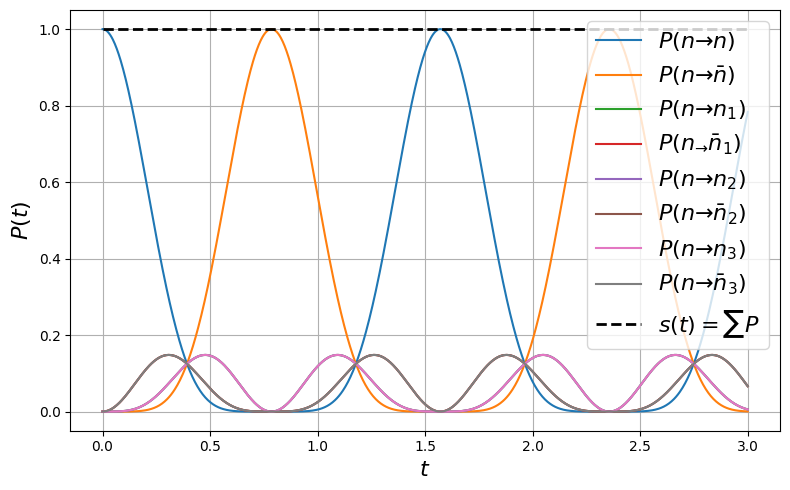

In [183]:
params = {
    eps: 2,
    m: 1.0
}
P_dict = {
    r"$P(n\to n)$": P_8[0,0],
    r"$P(n\to \bar n)$": P_8[0,1],
    r"$P(n\to n_1)$": P_8[0,2],
    r"$P(n_\to \bar n_1)$": P_8[0,3],
    r"$P(n\to n_2)$": P_8[0,4],
    r"$P(n\to \bar n_2)$": P_8[0,5],
    r"$P(n\to n_3)$": P_8[0,6],
    r"$P(n\to \bar n_3)$": P_8[0,7],
}
P_funcs = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict.items()
}
t_vals = np.linspace(0, 3, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs.items():
    plt.plot(t_vals, f(t_vals), label=label)
#plt.plot(t_vals, np.ones_like(t_vals), 'k--', linewidth=2, label=r"$s=1$")
s_simpl2 = sp.trigsimp(s_8)

s_num_expr = sp.simplify(s_simpl2.subs(params))


s_func = sp.lambdify(t, s_num_expr, "numpy")


y = s_func(t_vals)
y = np.full_like(t_vals, y, dtype=float) if np.isscalar(y) else y
plt.plot(t_vals, y, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
s_8

sin(t*ε)**6 - 3*sin(t*ε)**4 + 3*sin(t*ε)**2 + cos(t*ε)**6

In [178]:
sp.simplify(P_8[0,0]+P_8[0,1]+P_8[0,2] + P_8[0,3] + P_8[0,4] + P_8[0,5] + P_8[0,6] + P_8[0,7])

sin(t*ε)**6 - 3*sin(t*ε)**4 + 3*sin(t*ε)**2 + cos(t*ε)**6

In [179]:
# 10x10

In [184]:
H_5 = sp.Matrix([[0, 0, 0, eps, 0, eps, 0, eps, 0, eps],
               [0, 0, eps, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0, 0, 0, eps, 0, eps, 0, eps],
               [eps, 0, 0, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0,eps, 0, 0, 0, eps, 0, eps],
               [eps, 0, eps, 0, 0, 0, eps, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, 0, 0, eps],
               [eps, 0, eps, 0, eps, 0, 0, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, eps, 0, 0],
               [eps, 0, eps, 0, eps, 0, eps, 0, 0, 0]])

In [185]:
H_5

Matrix([
[0, 0, 0, ε, 0, ε, 0, ε, 0, ε],
[0, 0, ε, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, 0, 0, ε, 0, ε, 0, ε],
[ε, 0, 0, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, 0, 0, ε, 0, ε],
[ε, 0, ε, 0, 0, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, 0, 0, ε],
[ε, 0, ε, 0, ε, 0, 0, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, ε, 0, 0],
[ε, 0, ε, 0, ε, 0, ε, 0, 0, 0]])

In [190]:
S_5=sp.simplify(sp.exp(-sp.I*H_5*t))

In [191]:
sp.simplify(S_5)

Matrix([
[((exp(3*I*t*ε) + 4)*exp(5*I*t*ε) + 4*exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10, ((4 - exp(3*I*t*ε))*exp(5*I*t*ε) - 4*exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,       (exp(8*I*t*ε) - exp(5*I*t*ε) - exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,      (-exp(8*I*t*ε) - exp(5*I*t*ε) + exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,       (exp(8*I*t*ε) - exp(5*I*t*ε) - exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,      (-exp(8*I*t*ε) - exp(5*I*t*ε) + exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,       (exp(8*I*t*ε) - exp(5*I*t*ε) - exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,      (-exp(8*I*t*ε) - exp(5*I*t*ε) + exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,       (exp(8*I*t*ε) - exp(5*I*t*ε) - exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,      (-exp(8*I*t*ε) - exp(5*I*t*ε) + exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10],
[((4 - exp(3*I*t*ε))*exp(5*I*t*ε) - 4*exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10, ((exp(3*I*t*ε) + 4)*exp(5*I*t*ε) + 4*exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,      (-exp(8*I*t*ε) - exp(5*I*t*ε) + exp(3*I*t*ε) + 1)*exp(-4*I*t*ε)/10,       (exp(8*I*t*ε) - exp(5*I*t*ε) - ex

In [192]:
k_10=10
P_10=sp.zeros(k_10,k_10)
for i in range(k_10):
    for j in range (k_10):
        P_10[i,j]=sp.simplify(sp.expand_complex(S_5[i,j]*S_5[i,j].conjugate()))
sp.simplify(sp.expand_complex(S_diag[0,0]*S_diag[0,0].conjugate()))
P_10

Matrix([
[                                                                                                                                                                        8*cos(2*t*ε)/25 + 4*cos(3*t*ε)/25 + 4*cos(5*t*ε)/25 + cos(8*t*ε)/50 + 17/50,                                                                                                                                                                        -8*cos(2*t*ε)/25 - 4*cos(3*t*ε)/25 + 4*cos(5*t*ε)/25 - cos(8*t*ε)/50 + 17/50,  (sin(3*t*ε) + sin(5*t*ε) - sin(8*t*ε))**2/100 + cos(3*t*ε)**2/100 + cos(3*t*ε)*cos(5*t*ε)/50 - cos(3*t*ε)*cos(8*t*ε)/50 - cos(3*t*ε)/50 + cos(5*t*ε)**2/100 - cos(5*t*ε)*cos(8*t*ε)/50 - cos(5*t*ε)/50 + cos(8*t*ε)**2/100 + cos(8*t*ε)/50 + 1/100, (-sin(3*t*ε) + sin(5*t*ε) + sin(8*t*ε))**2/100 + cos(3*t*ε)**2/100 - cos(3*t*ε)*cos(5*t*ε)/50 - cos(3*t*ε)*cos(8*t*ε)/50 + cos(3*t*ε)/50 + cos(5*t*ε)**2/100 + cos(5*t*ε)*cos(8*t*ε)/50 - cos(5*t*ε)/50 + cos(8*t*ε)**2/100 - cos(8*t*ε)/50 + 1/100,  (sin(3*t*

In [193]:
sp.simplify(sp.expand_complex(S_5[0,9]*S_5[0,9].conjugate()))

(-sin(3*t*ε) + sin(5*t*ε) + sin(8*t*ε))**2/100 + cos(3*t*ε)**2/100 - cos(3*t*ε)*cos(5*t*ε)/50 - cos(3*t*ε)*cos(8*t*ε)/50 + cos(3*t*ε)/50 + cos(5*t*ε)**2/100 + cos(5*t*ε)*cos(8*t*ε)/50 - cos(5*t*ε)/50 + cos(8*t*ε)**2/100 - cos(8*t*ε)/50 + 1/100

In [194]:
P_10[0,9]

(-sin(3*t*ε) + sin(5*t*ε) + sin(8*t*ε))**2/100 + cos(3*t*ε)**2/100 - cos(3*t*ε)*cos(5*t*ε)/50 - cos(3*t*ε)*cos(8*t*ε)/50 + cos(3*t*ε)/50 + cos(5*t*ε)**2/100 + cos(5*t*ε)*cos(8*t*ε)/50 - cos(5*t*ε)/50 + cos(8*t*ε)**2/100 - cos(8*t*ε)/50 + 1/100

In [195]:
s_10=sp.simplify(P_10[0,0]+P_10[0,1]+P_10[0,2]+P_10[0,3]+P_10[0,4]+P_10[0,5]+P_10[0,6]+P_10[0,7]+P_10[0,8]+P_10[0,9])

In [196]:
sp.simplify(s_10)

(-sin(3*t*ε) + sin(5*t*ε) + sin(8*t*ε))**2/25 + (sin(3*t*ε) + sin(5*t*ε) - sin(8*t*ε))**2/25 + 2*cos(3*t*ε)**2/25 - 4*cos(3*t*ε)*cos(8*t*ε)/25 + 2*cos(5*t*ε)**2/25 + 4*cos(5*t*ε)/25 + 2*cos(8*t*ε)**2/25 + 19/25

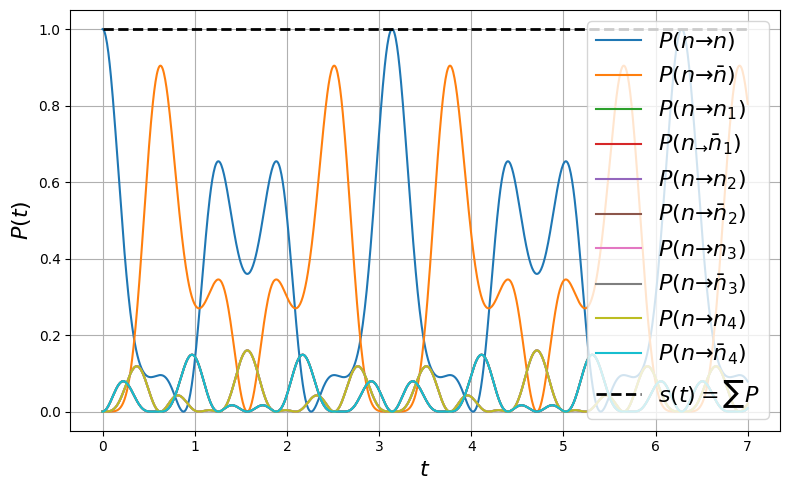

In [197]:
params = {
    eps: 2,
    m: 1.0
}
P_dict = {
    r"$P(n\to n)$": P_10[0,0],
    r"$P(n\to \bar n)$": P_10[0,1],
    r"$P(n\to n_1)$": P_10[0,2],
    r"$P(n_\to \bar n_1)$": P_10[0,3],
    r"$P(n\to n_2)$": P_10[0,4],
    r"$P(n\to \bar n_2)$": P_10[0,5],
    r"$P(n\to n_3)$": P_10[0,6],
    r"$P(n\to \bar n_3)$": P_10[0,7],
    r"$P(n\to n_4)$": P_10[0,8],
    r"$P(n\to \bar n_4)$": P_10[0,9]
}
P_funcs = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict.items()
}
t_vals = np.linspace(0, 7, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs.items():
    plt.plot(t_vals, f(t_vals), label=label)
#plt.plot(t_vals, np.ones_like(t_vals), 'k--', linewidth=2, label=r"$s=1$")
s_simpl2 = sp.trigsimp(s_10)

s_num_expr = sp.simplify(s_simpl2.subs(params))


s_func = sp.lambdify(t, s_num_expr, "numpy")


y = s_func(t_vals)
y = np.full_like(t_vals, y, dtype=float) if np.isscalar(y) else y
plt.plot(t_vals, y, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [198]:
#12x12

In [199]:
H_6=sp.Matrix([[0, 0, 0, eps, 0, eps, 0, eps, 0, eps, 0, eps],
               [0, 0, eps, 0, eps, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0, 0, 0, eps, 0, eps, 0, eps, 0, eps],
               [eps, 0, 0, 0, eps, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0,eps, 0, 0, 0, eps, 0, eps, 0, eps],
               [eps, 0, eps, 0, 0, 0, eps, 0, eps, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, 0, 0, eps, 0, eps],
               [eps, 0, eps, 0, eps, 0, 0, 0, eps, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, eps, 0, 0, 0, eps],
               [eps, 0, eps, 0, eps, 0, eps, 0, 0, 0, eps, 0],
               [0, eps, 0, eps, 0, eps, 0, eps, 0, eps, 0, 0],
               [eps, 0, eps, 0, eps, 0, eps, 0, eps, 0, 0, 0]])

In [200]:
H_6

Matrix([
[0, 0, 0, ε, 0, ε, 0, ε, 0, ε, 0, ε],
[0, 0, ε, 0, ε, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, 0, 0, ε, 0, ε, 0, ε, 0, ε],
[ε, 0, 0, 0, ε, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, 0, 0, ε, 0, ε, 0, ε],
[ε, 0, ε, 0, 0, 0, ε, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, 0, 0, ε, 0, ε],
[ε, 0, ε, 0, ε, 0, 0, 0, ε, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, ε, 0, 0, 0, ε],
[ε, 0, ε, 0, ε, 0, ε, 0, 0, 0, ε, 0],
[0, ε, 0, ε, 0, ε, 0, ε, 0, ε, 0, 0],
[ε, 0, ε, 0, ε, 0, ε, 0, ε, 0, 0, 0]])

In [201]:
S_6=sp.simplify(sp.exp(-sp.I*H_6*t))

In [202]:
S_6

Matrix([
[((exp(4*I*t*ε) + 5)*exp(6*I*t*ε) + 5*exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12, ((5 - exp(4*I*t*ε))*exp(6*I*t*ε) - 5*exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,      (exp(10*I*t*ε) - exp(6*I*t*ε) - exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,     (-exp(10*I*t*ε) - exp(6*I*t*ε) + exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,      (exp(10*I*t*ε) - exp(6*I*t*ε) - exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,     (-exp(10*I*t*ε) - exp(6*I*t*ε) + exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,      (exp(10*I*t*ε) - exp(6*I*t*ε) - exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,     (-exp(10*I*t*ε) - exp(6*I*t*ε) + exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,      (exp(10*I*t*ε) - exp(6*I*t*ε) - exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,     (-exp(10*I*t*ε) - exp(6*I*t*ε) + exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,      (exp(10*I*t*ε) - exp(6*I*t*ε) - exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12,     (-exp(10*I*t*ε) - exp(6*I*t*ε) + exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12],
[((5 - exp(4*I*t*ε))*exp(6*I*t*ε) - 5*exp(4*I*t*ε) + 1)*exp(-5*I*t*ε)/12, ((exp(4*I*t*ε) + 5)*exp(6*I*t*ε) + 5*ex

In [203]:
k_12=12
P_12=sp.zeros(k_12,k_12)
for i in range(k_12):
    for j in range (k_12):
        P_12[i,j]=sp.simplify(sp.expand_complex(S_6[i,j]*S_6[i,j].conjugate()))
sp.simplify(sp.expand_complex(S_diag[0,0]*S_diag[0,0].conjugate()))
P_12

Matrix([
[832*sin(t*ε)**8/9 - 1664*sin(t*ε)**6/9 - 52*sin(t*ε)**4*sin(3*t*ε)**2/9 + 376*sin(t*ε)**4/3 - 91*sin(t*ε)**2/3 + 17*sin(3*t*ε)**2/9 + sin(5*t*ε)**2/3 + 1,    -832*sin(t*ε)**8/9 + 1664*sin(t*ε)**6/9 + 52*sin(t*ε)**4*sin(3*t*ε)**2/9 - 376*sin(t*ε)**4/3 + 91*sin(t*ε)**2/3 - 22*sin(3*t*ε)**2/9 - sin(5*t*ε)**2/3,                                      -cos(2*t*ε)**2/36 - cos(2*t*ε)*cos(6*t*ε)/36 + cos(2*t*ε)/72 - cos(6*t*ε)/36 + cos(8*t*ε)/72 + cos(10*t*ε)/72 + 1/24,                              -16*sin(t*ε)**8/9 + 32*sin(t*ε)**6/9 - 19*sin(t*ε)**4/9 + sin(t*ε)**2*sin(3*t*ε)**2/9 + 11*sin(t*ε)**2/36 + sin(5*t*ε)**2/36,                                      -cos(2*t*ε)**2/36 - cos(2*t*ε)*cos(6*t*ε)/36 + cos(2*t*ε)/72 - cos(6*t*ε)/36 + cos(8*t*ε)/72 + cos(10*t*ε)/72 + 1/24,                              -16*sin(t*ε)**8/9 + 32*sin(t*ε)**6/9 - 19*sin(t*ε)**4/9 + sin(t*ε)**2*sin(3*t*ε)**2/9 + 11*sin(t*ε)**2/36 + sin(5*t*ε)**2/36,                                      -cos(2*t*ε)**2/36 - cos

In [204]:
s_12=sp.simplify(P_12[0,0]+P_12[0,1]+P_12[0,2]+P_12[0,3]+P_12[0,4]+P_12[0,5]+P_12[0,6]+P_12[0,7]+P_12[0,8]+P_12[0,9]+P_12[0,10]+P_12[0,11])

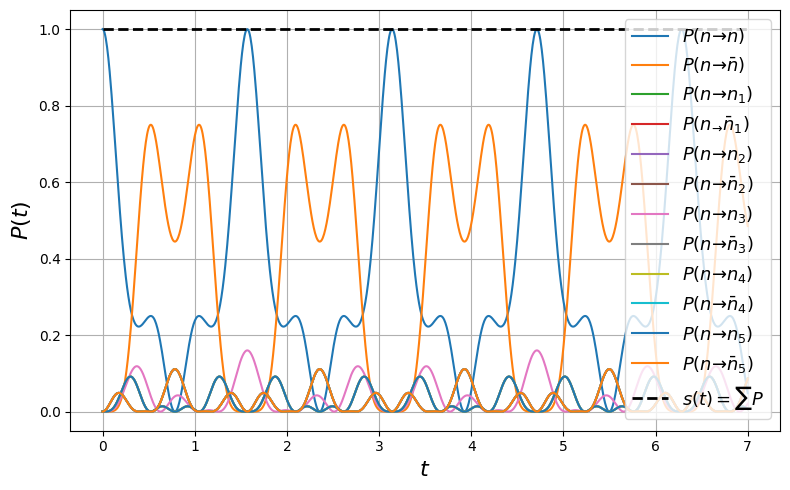

In [189]:
params = {
    eps: 2,
    m: 1.0
}
P_dict = {
    r"$P(n\to n)$": P_12[0,0],
    r"$P(n\to \bar n)$": P_12[0,1],
    r"$P(n\to n_1)$": P_12[0,2],
    r"$P(n_\to \bar n_1)$": P_12[0,3],
    r"$P(n\to n_2)$": P_12[0,4],
    r"$P(n\to \bar n_2)$": P_12[0,5],
    r"$P(n\to n_3)$": P_10[0,6],
    r"$P(n\to \bar n_3)$": P_12[0,7],
    r"$P(n\to n_4)$": P_12[0,8],
    r"$P(n\to \bar n_4)$": P_12[0,9],
    r"$P(n\to n_5)$": P_12[0,10],
    r"$P(n\to \bar n_5)$": P_12[0,11],
}
P_funcs = {
    label: sp.lambdify(t, expr.subs(params), "numpy")
    for label, expr in P_dict.items()
}
t_vals = np.linspace(0, 7, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs.items():
    plt.plot(t_vals, f(t_vals), label=label)
#plt.plot(t_vals, np.ones_like(t_vals), 'k--', linewidth=2, label=r"$s=1$")
s_simpl2 = sp.trigsimp(s_12)

s_num_expr = sp.simplify(s_simpl2.subs(params))


s_func = sp.lambdify(t, s_num_expr, "numpy")


y = s_func(t_vals)
y = np.full_like(t_vals, y, dtype=float) if np.isscalar(y) else y
plt.plot(t_vals, y, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$P(t)$", fontsize=16)
plt.legend(fontsize=12.9, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
H_4

In [ ]:
H_4_a =sp.Matrix([[5, 0, 0, 1, 0, 1, 0, 1],
               [0, -5, 1, 0, 1, 0, 1, 0],
               [0, 1, 0, 0, 0, 1, 0, 1],
               [1, 0, 0, 0, 1, 0, 1, 0],
               [0, 1, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 0, 0, 0, 1, 0],
               [0, 1, 0, 1, 0, 1, 0, 0],
               [1, 0, 1, 0, 1, 0, 0, 0]])

In [51]:
H_4@H_4

Matrix([
[3*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0],
[     0, 3*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0, 2*ε**2],
[2*ε**2,      0, 3*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0],
[     0, 2*ε**2,      0, 3*ε**2,      0, 2*ε**2,      0, 2*ε**2],
[2*ε**2,      0, 2*ε**2,      0, 3*ε**2,      0, 2*ε**2,      0],
[     0, 2*ε**2,      0, 2*ε**2,      0, 3*ε**2,      0, 2*ε**2],
[2*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0, 3*ε**2,      0],
[     0, 2*ε**2,      0, 2*ε**2,      0, 2*ε**2,      0, 3*ε**2]])

In [52]:
H_4@H_4@H_4

Matrix([
[     0, 6*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0, 7*ε**3],
[6*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0],
[     0, 7*ε**3,      0, 6*ε**3,      0, 7*ε**3,      0, 7*ε**3],
[7*ε**3,      0, 6*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0],
[     0, 7*ε**3,      0, 7*ε**3,      0, 6*ε**3,      0, 7*ε**3],
[7*ε**3,      0, 7*ε**3,      0, 6*ε**3,      0, 7*ε**3,      0],
[     0, 7*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0, 6*ε**3],
[7*ε**3,      0, 7*ε**3,      0, 7*ε**3,      0, 6*ε**3,      0]])

In [53]:
#sp.simplify(sp.exp(-sp.I*H_4_a*t))

In [54]:
#1. ricxvobribvad chavwero eta, a, b, diagonalizacia, eigenvalues, eigenvectors, mocemuli eta eps
#2. mwkrivshi gashla eps t ti, pirveli wevri davtovo
#3. sin-bit chavwero
#4. patara t ebistvis shevadaro H*H*H
#5. eps da etebi matricashi
H_eta_eps=sp.Matrix([[m, 0, 0, eps, 0, eta, 0, eta],
                     [0, m, eps, 0, eta, 0, eta, 0],
                     [0, eps, m, 0, 0, eta, 0, eta],
                     [eps, 0, 0, m, eta, 0, eta, 0],
                     [0, eta, 0, eta, m, 0, 0, eps],
                     [eta, 0, eta, 0, 0, m, eps, 0],
                     [0, eta, 0, eta, 0, eps, m, 0],
                     [eta, 0, eta, 0, eps, 0, 0, m]])
#6. matrix phase garet davwero

In [55]:
# Test

In [56]:
# rewriting in sin

In [57]:
P_6

Matrix([
[2*cos(t*ε)/9 + 2*cos(2*t*ε)/9 + 2*cos(3*t*ε)/9 + cos(4*t*ε)/18 + 5/18,    -4*sin(t*ε)**4/9 + 8*sin(t*ε)**2/9 - 2*cos(t*ε)/9 + 2*cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9],
[   -4*sin(t*ε)**4/9 + 8*sin(t*ε)**2/9 - 2*cos(t*ε)/9 + 2*cos(3*t*ε)/9, 2*cos(t*ε)/9 + 2*cos(2*t*ε)/9 + 2*cos(3*t*ε)/9 + cos(4*t*ε)/18 + 5/18,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*t*ε)/9,               cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9],
[              cos(t*ε)*cos(3*t*ε)/9 - cos(t*ε)/9 - cos(3*t*ε)/9 + 1/9,        -4*sin(t*ε)**4/9 + 5*sin(t*ε)**2/9 + cos(t*ε)/9 - cos(3*

In [58]:
# rewriting with sin

In [119]:
def cos_to_sin2_halfangle(expr: sp.Expr) -> sp.Expr:
    """Replace cos(u) -> 1 - 2*sin(u/2)**2 everywhere (no phase shift)."""
    u = sp.Wild('u')
    out = expr.replace(sp.cos(u), 1 - 2*sp.sin(u/2)**2)
    expr = str(sp.expand(out))
    return (expr
    ) 

#print(expr_sin2)

# numeric approximation example
#print(sp.N(expr_sin2.subs({t: 1.0, eps: 0.2})))

In [120]:
def pretty_s(expr):
    expr = str(expr)
    return (expr
        .replace("**6", "⁶")
        .replace("**5", "⁵")
        .replace("**4", "⁴")
        .replace("**3", "³")
        .replace("**2", "²")
        .replace("*", "")
    )

In [61]:
p_6_sin=sp.zeros(6,6)
P_6_approx=sp.zeros(6,6)

In [104]:
#p_6_sin

In [105]:
p_6_sin = P_6.applyfunc(cos_to_sin2_halfangle)

# example: expand in eps up to eps^5 (order=6)
t, eps = sp.symbols('t eps')
#p_6_sin_series = p_6_sin.applyfunc(lambda e: sp.series(e, eps, 0, 6).removeO().expand())

# display each entry with indices
for i in range(6):
    for j in range(6):
        display(Math(rf"P6_{{{i}{j}}}=" + sp.latex(p_6_sin[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [106]:
# expanding in series of eps*t

In [107]:
expr_series = sp.series(p_6_sin[0,0], t, 0, 7).removeO().expand()

In [108]:
expr_series

-101*t**6*ε**6/180 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1

In [797]:
#p_6_sin[0,1]

In [110]:
#p_6_sin_series

In [111]:
#eps, t=sp.symbols('ε t', real=True)
P_6_approx = p_6_sin.applyfunc(lambda e: sp.series(e, t, 0, 9).removeO())

In [112]:
#sp.series(p_6_sin[0,0], t, 0, 7).removeO()

In [113]:
P_6_approx

Matrix([
[1289*t**8*ε**8/10080 - 101*t**6*ε**6/180 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1,                                                -t**8*ε**8/18 + t**6*ε**6/9,                          209*t**8*ε**8/2880 - 5*t**6*ε**6/24 + t**4*ε**4/4,              -137*t**8*ε**8/1260 + 13*t**6*ε**6/30 - t**4*ε**4 + t**2*ε**2,                          209*t**8*ε**8/2880 - 5*t**6*ε**6/24 + t**4*ε**4/4,              -137*t**8*ε**8/1260 + 13*t**6*ε**6/30 - t**4*ε**4 + t**2*ε**2],
[                                               -t**8*ε**8/18 + t**6*ε**6/9, 1289*t**8*ε**8/10080 - 101*t**6*ε**6/180 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1,              -137*t**8*ε**8/1260 + 13*t**6*ε**6/30 - t**4*ε**4 + t**2*ε**2,                          209*t**8*ε**8/2880 - 5*t**6*ε**6/24 + t**4*ε**4/4,              -137*t**8*ε**8/1260 + 13*t**6*ε**6/30 - t**4*ε**4 + t**2*ε**2,                          209*t**8*ε**8/2880 - 5*t**6*ε**6/24 + t**4*ε**4/4],
[                         209*t**8*ε**8/2880 - 5*t**6*ε**6/24 + t**4*ε**4/4

In [ ]:
# comparing with expansion calculation

In [119]:
eps, t=sp.symbols('ε t', real=True)
n=6
H_r = sp.Matrix([[0, 0, 0, eps, 0, eps],
               [0, 0, eps, 0, eps, 0],
               [0, eps, 0, 0, 0, eps],
               [eps, 0, 0, 0, eps, 0],
               [0, eps, 0,eps,0,0],
               [eps, 0, eps, 0, 0,0]])
S_3_r=I-sp.I*H_r*t-1/2*(H_r**2)*t**2-sp.I/6*(H_r**3)*t**3+1/24*(H_r**4)*t**4
P_6_r=sp.zeros(n,n)
for i in range (n):
    for j in range (n):
        P_6_r[i,j]=sp.expand(sp.nsimplify((S_3_r[i,j]*S_3_r[i,j].conjugate())))
        

In [121]:
#I-sp.I*H_r*t-1/2*(H_r**2)*t**2-sp.I/6*(H_r**3)*t**3

In [123]:
#sp.expand(sp.nsimplify(S_3_r))

In [124]:
P_6_r

Matrix([
[t**8*ε**8/16 - t**6*ε**6/2 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1,                                                  t**6*ε**6/9,              25*t**8*ε**8/576 - 5*t**6*ε**6/24 + t**4*ε**4/4,                          t**6*ε**6/4 + t**4*ε**4 + t**2*ε**2,              25*t**8*ε**8/576 - 5*t**6*ε**6/24 + t**4*ε**4/4,                          t**6*ε**6/4 + t**4*ε**4 + t**2*ε**2],
[                                                 t**6*ε**6/9, t**8*ε**8/16 - t**6*ε**6/2 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1,                          t**6*ε**6/4 + t**4*ε**4 + t**2*ε**2,              25*t**8*ε**8/576 - 5*t**6*ε**6/24 + t**4*ε**4/4,                          t**6*ε**6/4 + t**4*ε**4 + t**2*ε**2,              25*t**8*ε**8/576 - 5*t**6*ε**6/24 + t**4*ε**4/4],
[             25*t**8*ε**8/576 - 5*t**6*ε**6/24 + t**4*ε**4/4,                          t**6*ε**6/4 + t**4*ε**4 + t**2*ε**2, t**8*ε**8/16 - t**6*ε**6/2 + 3*t**4*ε**4/2 - 2*t**2*ε**2 + 1,                                                  t**6*ε*

In [125]:
display(Math(r"P6_{exp} = " + latex(P_6_r) + r",\quad P6_{approx} = " + latex(P_6_approx)   ))

<IPython.core.display.Math object>

In [ ]:
# eta a b ricxvobrivad

In [204]:
a=5
b=3
eta=1/2
eps=1

In [205]:
H_44_split_eta = sp.Matrix([[a, 0, eta, eps],
               [0, -a, eps, eta],
               [eta, eps, 0, 0],
               [eps, eta, 0, 0]])

In [206]:
#eps, t, a, b, eta =sp.symbols('ε t a b η', real=True)

In [207]:
P, D = H_44_split_eta.diagonalize()

In [208]:
H_44_split_eta

Matrix([
[  5,   0, 0.5,   1],
[  0,  -5,   1, 0.5],
[0.5,   1,   0,   0],
[  1, 0.5,   0,   0]])

In [209]:
I = sp.I

# Eigen-decomposition data
eigs = H_44_split_eta.eigenvects()   # [(eigenvalue, multiplicity, [basis vectors]), ...]

# Collect eigenvectors (one per eigenvalue basis vector)
vecs = []
vals = []
for val, mult, basis in eigs:
    for v in basis:
        vecs.append(v)
        vals.append(val)

# Form matrix with eigenvectors as columns
V = sp.Matrix.hstack(*vecs)

# Orthonormalize columns (Hermitian inner product)
# sympy has GramSchmidt; for complex vectors, we normalize using conjugate dot products
def hermitian_normalize(v):
    norm2 = (v.conjugate().T * v)[0]
    return sp.simplify(v / sp.sqrt(norm2))

# Basic Gram-Schmidt (Hermitian)
M=hermitian_normalize(V)

In [210]:
M*M.T

Matrix([
[                  1.0, -6.93889390390723e-18, -5.20417042793042e-18,                    0],
[-6.93889390390723e-18,                   1.0,  6.07153216591882e-18,                    0],
[-5.20417042793042e-18,  6.07153216591882e-18,                   1.0, 6.93889390390723e-18],
[                    0,                     0,  6.93889390390723e-18,                  1.0]])

In [211]:
M.T@H_44_split_eta@M

Matrix([
[    -5.24209216036365,  4.16333634234434e-17, -5.72458747072346e-17, 5.55111512312578e-17],
[-4.16333634234434e-17,      5.24209216036365, -3.81639164714898e-17, 1.11022302462516e-16],
[ 1.13190706807487e-16,  1.70219741080224e-17,      0.14307264677086, 8.67361737988404e-19],
[-2.77555756156289e-17, -6.93889390390723e-17,  6.93889390390723e-18,    -0.14307264677086]])

In [176]:
Ucols = []
for v in V.columnspace():
    w = v
    for u in Ucols:
        proj = (u.conjugate().T * w)[0] * u
        w = sp.simplify(w - proj)
    Ucols.append(hermitian_normalize(w))

U = sp.Matrix.hstack(*Ucols)

# Diagonal via U† H U
#D = sp.simplify(U.conjugate().T * H * U)

#print("U:")
#sp.pprint(U)
#print("\nD = U† H U:")
#sp.pprint(D)

In [189]:
vecs

[Matrix([
 [ 0.0186342046741853],
 [  0.977177525770998],
 [ -0.188187196624879],
 [-0.0967596432956452]]),
 Matrix([
 [ 0.977177525770998],
 [0.0186342046741853],
 [0.0967596432956452],
 [ 0.188187196624879]]),
 Matrix([
 [0.0967596432956452],
 [-0.188187196624879],
 [-0.977177525770998],
 [0.0186342046741853]]),
 Matrix([
 [ -0.188187196624879],
 [ 0.0967596432956452],
 [-0.0186342046741853],
 [  0.977177525770998]])]

In [236]:
vals

[-5.24209216036364, 5.24209216036364, 0.143072646770860, -0.143072646770860]

In [ ]:
# trying H matrix

In [95]:
eps, t, eta=sp.symbols('ε t η', real=True)
H_eta_eps=sp.Matrix([[m, 0, 0, eps, 0, eta, 0, eta],
                     [0, m, eps, 0, eta, 0, eta, 0],
                     [0, eps, m, 0, 0, eta, 0, eta],
                     [eps, 0, 0, m, eta, 0, eta, 0],
                     [0, eta, 0, eta, m, 0, 0, eps],
                     [eta, 0, eta, 0, 0, m, eps, 0],
                     [0, eta, 0, eta, 0, eps, m, 0],
                     [eta, 0, eta, 0, eps, 0, 0, m]])

In [96]:
H_eta_eps_r=sp.Matrix([[0, 0, 0, eps, 0, eta, 0, eta],
                     [0, 0, eps, 0, eta, 0, eta, 0],
                     [0, eps, 0, 0, 0, eta, 0, eta],
                     [eps, 0, 0, 0, eta, 0, eta, 0],
                     [0, eta, 0, eta, 0, 0, 0, eps],
                     [eta, 0, eta, 0, 0, 0, eps, 0],
                     [0, eta, 0, eta, 0, eps, 0, 0],
                     [eta, 0, eta, 0, eps, 0, 0, 0]])

In [97]:
H_eta_eps_r

Matrix([
[0, 0, 0, ε, 0, η, 0, η],
[0, 0, ε, 0, η, 0, η, 0],
[0, ε, 0, 0, 0, η, 0, η],
[ε, 0, 0, 0, η, 0, η, 0],
[0, η, 0, η, 0, 0, 0, ε],
[η, 0, η, 0, 0, 0, ε, 0],
[0, η, 0, η, 0, ε, 0, 0],
[η, 0, η, 0, ε, 0, 0, 0]])

In [98]:
H_eta_eps

Matrix([
[m, 0, 0, ε, 0, η, 0, η],
[0, m, ε, 0, η, 0, η, 0],
[0, ε, m, 0, 0, η, 0, η],
[ε, 0, 0, m, η, 0, η, 0],
[0, η, 0, η, m, 0, 0, ε],
[η, 0, η, 0, 0, m, ε, 0],
[0, η, 0, η, 0, ε, m, 0],
[η, 0, η, 0, ε, 0, 0, m]])

In [99]:
#import numpy as np
#def sin_theta_from_tan2(tan2theta):
#   return np.sqrt(
#       (-1 + np.sqrt(1 / (1 + tan2theta**2))) / 2
#    )

In [100]:
#sp.nsimplify(sin_theta_from_tan2(-2*sp.sqrt(2)))

In [101]:
#def sin_theta_from_tan2(tan2theta):
#    return sp.sqrt(
#        (1 + sp.sqrt(1 / (1 + tan2theta**2))) / 2
#    )

In [102]:
theta = sp.symbols('theta', real=True)

In [103]:
def sin_theta_from_tan2_all(tan2theta, theta):
    r = sp.sqrt(1 / (1 + tan2theta**2))
    
    sin_branches = [
        sp.sqrt((1 + r) / 2),
        -sp.sqrt((1 + r) / 2),
        sp.sqrt((1 - r) / 2),
        -sp.sqrt((1 - r) / 2),
    ]
    cos_branches = [
        sp.sqrt((1 - r)/2),
        -sp.sqrt((1 - r)/2),
        sp.sqrt((1 + r)/2),
        -sp.sqrt((1 + r)/2),
    ]

    #equations = [sp.Eq(sp.sin(theta), b) for b in branches]
    #equations = [sp.Eq(sp.sin(theta), sp.simplify(b)) for b in branches]

    for i, (s, c) in enumerate(zip(sin_branches, cos_branches), 1):
        print(f"\nBranch {i}:")
        sp.pprint(sp.Eq(sp.sin(theta), sp.simplify(s)))
        sp.pprint(sp.Eq(sp.cos(theta), sp.simplify(c)))


In [104]:
sin_theta_from_tan2_all(R(2,1), theta)


Branch 1:
           ____________
         ╲╱ 10⋅√5 + 50 
sin(θ) = ──────────────
               10      
           ____________
         ╲╱ 50 - 10⋅√5 
cos(θ) = ──────────────
               10      

Branch 2:
            ____________ 
         -╲╱ 10⋅√5 + 50  
sin(θ) = ────────────────
                10       
            ____________ 
         -╲╱ 50 - 10⋅√5  
cos(θ) = ────────────────
                10       

Branch 3:
           ____________
         ╲╱ 50 - 10⋅√5 
sin(θ) = ──────────────
               10      
           ____________
         ╲╱ 10⋅√5 + 50 
cos(θ) = ──────────────
               10      

Branch 4:
            ____________ 
         -╲╱ 50 - 10⋅√5  
sin(θ) = ────────────────
                10       
            ____________ 
         -╲╱ 10⋅√5 + 50  
cos(θ) = ────────────────
                10       


In [105]:
#sp.simplify(sp.exp(-sp.I*H_eta_eps*t))

In [106]:
U_nnbar_8 = sp.Matrix([
    [ sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0, 0 ],
    [ sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0, 0 ],

    [ 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],
    [ 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],

    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0 ],
    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0 ],
    
    [0, 0, 0, 0, 0, 0, sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2) ],
    [0, 0, 0, 0, 0, 0, sp.sqrt(2)*R(1,2), sp.sqrt(2)*R(1,2) ]
])

# Optional: check unitarity
U_131_8= sp.Matrix([
    [sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0,0,0],
    [0,  sp.sqrt(2)*R(1,2), 0, -sp.sqrt(2)*R(1,2), 0, 0, 0, 0],
    [-sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0],
    [0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0,  0, 0, 0, 0,  1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])
U_11=sp.sqrt(3)*R(1,3)
U_22=U_11
U_12=(sp.sqrt(6))*R(1,3)
U_21=-U_12
U_3526= sp.Matrix([
    [1, 0, 0, 0, 0, 0],
    [0,  U_11, 0, 0,0, U_12 ],
    [0, 0, U_11, 0, U_12, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, U_21, 0, U_22, 0],
    [0,  U_21, 0, 0, 0,  U_22]
])

In [107]:
U_nnbar_8.T@H_eta_eps@U_nnbar_8

Matrix([
[m,  0, ε,  0, η,  0, η,  0],
[0,  m, 0, -ε, 0, -η, 0, -η],
[ε,  0, m,  0, η,  0, η,  0],
[0, -ε, 0,  m, 0, -η, 0, -η],
[η,  0, η,  0, m,  0, ε,  0],
[0, -η, 0, -η, 0,  m, 0, -ε],
[η,  0, η,  0, ε,  0, m,  0],
[0, -η, 0, -η, 0, -ε, 0,  m]])

In [108]:
S_44

Matrix([
[ 1/2, -1/2, 1/2,  1/2],
[ 1/2,  1/2, 1/2, -1/2],
[-1/2, -1/2, 1/2, -1/2],
[-1/2,  1/2, 1/2,  1/2]])

In [109]:
S_88=sp.Matrix([[1/2, -1/2, 1/2, 1/2, 1/2, -1/2, 1/2, 1/2],
               [1/2, 1/2, 1/2, -1/2, 1/2, 1/2, 1/2, -1/2],
               [-1/2, -1/2, 1/2, -1/2, -1/2, -1/2, 1/2, -1/2],
               [-1/2, 1/2, 1/2, 1/2, -1/2, 1/2, 1/2, 1/2],
               [1/2, -1/2, 1/2, 1/2, 1/2, -1/2, 1/2, 1/2],
               [1/2, 1/2, 1/2, -1/2, 1/2, 1/2, 1/2, -1/2],
               [-1/2, -1/2, 1/2, -1/2, -1/2, -1/2, 1/2, -1/2],
               [-1/2, 1/2, 1/2, 1/2, -1/2, 1/2, 1/2, 1/2]])
S_88 = S_88.applyfunc(sp.Rational)

In [110]:
S_88_1=sp.Matrix([
    [ sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0, 0 ],
    [ sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0, 0 ],

    [ 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],
    [ 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0, 0, 0 ],

    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2), 0, 0 ],
    [ 0, 0, 0, 0,  sp.sqrt(2)*R(1,2),  sp.sqrt(2)*R(1,2), 0, 0 ],
    
    [0, 0, 0, 0, 0, 0, sp.sqrt(2)*R(1,2), -sp.sqrt(2)*R(1,2) ],
    [0, 0, 0, 0, 0, 0, sp.sqrt(2)*R(1,2), sp.sqrt(2)*R(1,2) ]
])

S_88_2=sp.Matrix([
    [sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0],
    [0,  sp.sqrt(2)*R(1,2), 0, -sp.sqrt(2)*R(1,2), 0, 0, 0, 0],
    [-sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0, 0, 0],
    [0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0, 0, 0, 0],
    [0, 0, 0, 0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
    [0,  0, 0, 0, 0,  sp.sqrt(2)*R(1,2), 0, -sp.sqrt(2)*R(1,2)],
    [0, 0, 0, 0, -sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2), 0],
    [0, 0, 0, 0, 0, sp.sqrt(2)*R(1,2), 0, sp.sqrt(2)*R(1,2)]
])

S_88_3=sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0,  sp.sqrt(2)*R(1,2), 0, 0, 0, -sp.sqrt(2)*R(1,2), 0, 0],
    [0, 0, sp.sqrt(2)*R(1,2), 0, 0, 0, sp.sqrt(2)*R(1,2), 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0,  sp.sqrt(2)*R(1,2), 0, 0, 0,  sp.sqrt(2)*R(1,2), 0, 0],
    [0, 0, -sp.sqrt(2)*R(1,2), 0, 0, 0, sp.sqrt(2)*R(1,2), 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
])

In [111]:
H_D_88=sp.simplify(S_88_3.T@S_88_2.T@S_88_1.T@H_eta_eps_r@S_88_1@S_88_2@S_88_3)

In [112]:
s_88=S_88_1@S_88_2@S_88_3

In [113]:
#sp.simplify(S_88_2.T@S_88_1.T@H_eta_eps_r@S_88_1@S_88_2)

In [114]:
S_88=sp.simplify(s_88*sp.exp(-sp.I*H_D_88*t)*s_88.H)

In [115]:
sp.simplify(S_88)

Matrix([
[ ((2*exp(2*I*t*ε) + exp(2*I*t*η) + exp(2*I*t*(ε - η)) + exp(2*I*t*(ε + η)) + 2)*exp(2*I*t*η) + 1)*exp(-I*t*(ε + 2*η))/8,  ((2*exp(2*I*t*ε) + exp(2*I*t*η) - exp(2*I*t*(ε - η)) - exp(2*I*t*(ε + η)) - 2)*exp(2*I*t*η) + 1)*exp(-I*t*(ε + 2*η))/8, ((-2*exp(2*I*t*ε) + exp(2*I*t*η) + exp(2*I*t*(ε - η)) + exp(2*I*t*(ε + η)) - 2)*exp(2*I*t*η) + 1)*exp(-I*t*(ε + 2*η))/8, ((-2*exp(2*I*t*ε) + exp(2*I*t*η) - exp(2*I*t*(ε - η)) - exp(2*I*t*(ε + η)) + 2)*exp(2*I*t*η) + 1)*exp(-I*t*(ε + 2*η))/8,                                         (-exp(2*I*t*ε) - exp(4*I*t*η) + exp(2*I*t*(ε + 2*η)) + 1)*exp(-I*t*(ε + 2*η))/8,                                          (exp(2*I*t*ε) - exp(4*I*t*η) - exp(2*I*t*(ε + 2*η)) + 1)*exp(-I*t*(ε + 2*η))/8,                                         (-exp(2*I*t*ε) - exp(4*I*t*η) + exp(2*I*t*(ε + 2*η)) + 1)*exp(-I*t*(ε + 2*η))/8,                                          (exp(2*I*t*ε) - exp(4*I*t*η) - exp(2*I*t*(ε + 2*η)) + 1)*exp(-I*t*(ε + 2*η))/8],
[ ((2*exp(2*I*t*ε) + 

In [116]:
k=8
P_8=sp.zeros(k,k)
for i in range(k):
    for j in range (k):
        P_8[i,j]=sp.simplify(sp.expand_complex(S_88[i,j]*S_88[i,j].conjugate().rewrite(sp.sin)))
sp.simplify(sp.expand_complex(S_diag[0,0]*S_diag[0,0].conjugate()))
P_8

Matrix([
[            cos(t*ε)**2*cos(t*η)**4,             sin(t*ε)**2*sin(t*η)**4,             sin(t*η)**4*cos(t*ε)**2,             sin(t*ε)**2*cos(t*η)**4, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2],
[            sin(t*ε)**2*sin(t*η)**4,             cos(t*ε)**2*cos(t*η)**4,             sin(t*ε)**2*cos(t*η)**4,             sin(t*η)**4*cos(t*ε)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2],
[            sin(t*η)**4*cos(t*ε)**2,             sin(t*ε)**2*cos(t*η)**4,             cos(t*ε)**2*cos(t*η)**4,             sin(t*ε)**2*sin(t*η)**4, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2, sin(t*ε)**2*sin(t*η)**2*cos(t*η)**2, sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2],
[            sin(t*ε)**2*cos(t*η)**4,             sin(t*η)**4*cos(t*ε)**2,             sin(t*ε)**

In [121]:
p_8_sin = P_8.applyfunc(cos_to_sin2_halfangle)

# example: expand in eps up to eps^5 (order=6)
t, eps = sp.symbols('t eps')
#p_6_sin_series = p_6_sin.applyfunc(lambda e: sp.series(e, eps, 0, 6).removeO().expand())

# display each entry with indices
for i in range(k):
    for j in range(k):
        display(Math(rf"P8_{{{i}{j}}}=" + sp.latex(p_8_sin[i, j])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
P_8_approx = p_8_sin.applyfunc(lambda e: sp.series(e, t, 0, 9).removeO())

In [126]:
P_8_approx

Matrix([
[t**8*(ε**8/315 + 4*ε**6*η**2/45 + 5*ε**4*η**4/9 + 34*ε**2*η**6/45 + 13*η**8/63) + t**6*(-2*ε**6/45 - 2*ε**4*η**2/3 - 5*ε**2*η**4/3 - 34*η**6/45) + t**4*(ε**4/3 + 2*ε**2*η**2 + 5*η**4/3) + t**2*(-ε**2 - 2*η**2) + 1,                                                                                                                                                                  t**8*(-ε**4*η**4/3 - 2*ε**2*η**6/3) + t**6*ε**2*η**4,                                                                                                                                t**8*(ε**4*η**4/3 + 2*ε**2*η**6/3 + η**8/5) + t**6*(-ε**2*η**4 - 2*η**6/3) + t**4*η**4,                                                     t**8*(-ε**8/315 - 4*ε**6*η**2/45 - 5*ε**4*η**4/9 - 34*ε**2*η**6/45) + t**6*(2*ε**6/45 + 2*ε**4*η**2/3 + 5*ε**2*η**4/3) + t**4*(-ε**4/3 - 2*ε**2*η**2) + t**2*ε**2,                                                                                                        t**8*(2*ε**6*η**2/45 + 4*ε*

In [127]:
sp.simplify(sp.expand_complex(S_88[0,7]*S_88[0,7].conjugate().rewrite(sp.sin)))

sin(t*η)**2*cos(t*ε)**2*cos(t*η)**2

In [128]:
s_8 = sp.simplify(P_8[0,0] + P_8[0,1] + P_8[0,2] + P_8[0,3] + P_8[0,4] + P_8[0,5] + P_8[0,6] + P_8[0,7])

In [138]:
s_8

1

In [139]:
P_[0,0]

sin(t*ε)**2*sin(t*η)**4

In [137]:
params = {
    eps: 2,
    m: 1.0,
    eta: 1
}
P_dict_8 = {
    r"$P(n\to n)$": P_8[0,0],
    r"$P(\bar n_1\to n_1)$": P_8[0,1],
    r"$P(n_2\to n_1)$": P_8[0,2],
    r"$P(\bar n_2\to n_1)$": P_8[0,3],
    r"$P(n_3\to n_1)$": P_8[0,4],
    r"$P(\bar n_3\to n_1)$": P_8[0,5],
    r"$P(n_1\to n_3)$": P_8[0,6],
    r"$P(n_1\to \bar n_3)$": P_8[0,7]
}
P_funcs = {
    label: sp.lambdify(t, expr.subs(params))
    for label, expr in P_dict_8.items()
}
t_vals = np.linspace(0, 2, 1000)
plt.figure(figsize=(8,5))

for label, f in P_funcs.items():
    plt.plot(t_vals, f(t_vals), label=label)
#plt.plot(t_vals, np.ones_like(t_vals), 'k--', linewidth=2, label=r"$s=1$")
s_simpl2 = sp.trigsimp(s_8)

s_num_expr = sp.simplify(s_simpl2.subs(params))


s_func = sp.lambdify(t, s_num_expr, "numpy")


y = s_func(t_vals)
y = np.full_like(t_vals, y, dtype=float) if np.isscalar(y) else y
plt.plot(t_vals, y, 'k--', linewidth=2, label=r"$s(t)=\sum P$")

plt.xlabel(r"$t$")
plt.ylabel(r"$P(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: loop of ufunc does not support argument 0 of type Zero which has no callable cos method

<Figure size 800x500 with 0 Axes>

In [249]:
t_vals

array([0.        , 0.002002  , 0.004004  , 0.00600601, 0.00800801,
       0.01001001, 0.01201201, 0.01401401, 0.01601602, 0.01801802,
       0.02002002, 0.02202202, 0.02402402, 0.02602603, 0.02802803,
       0.03003003, 0.03203203, 0.03403403, 0.03603604, 0.03803804,
       0.04004004, 0.04204204, 0.04404404, 0.04604605, 0.04804805,
       0.05005005, 0.05205205, 0.05405405, 0.05605606, 0.05805806,
       0.06006006, 0.06206206, 0.06406406, 0.06606607, 0.06806807,
       0.07007007, 0.07207207, 0.07407407, 0.07607608, 0.07807808,
       0.08008008, 0.08208208, 0.08408408, 0.08608609, 0.08808809,
       0.09009009, 0.09209209, 0.09409409, 0.0960961 , 0.0980981 ,
       0.1001001 , 0.1021021 , 0.1041041 , 0.10610611, 0.10810811,
       0.11011011, 0.11211211, 0.11411411, 0.11611612, 0.11811812,
       0.12012012, 0.12212212, 0.12412412, 0.12612613, 0.12812813,
       0.13013013, 0.13213213, 0.13413413, 0.13613614, 0.13813814,
       0.14014014, 0.14214214, 0.14414414, 0.14614615, 0.14814

In [184]:
#S_88_rational